<a href="https://colab.research.google.com/github/lsoica/blog/blob/main/assets/2024-12/cross-entropy-loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cross Entropy Loss

Cross-entropy loss is used when adjusting model weights during training. The aim is to minimize the loss, i.e, the smaller the loss the better the model. A perfect model has a cross-entropy loss of 0. Normally its serves for multi-class and multi-label classifications.

It measures the difference between the predicted probability distribution and the true distribution.

$$ \text{H}(p,q) = - \sum_{i=1}^{n} p_i \log(q_i) $$

Where H is the cross-entropy function, P may be the target distribution and Q is the approximation of the target distribution.

Usually an activation function (Sigmoid / Softmax) is applied to the scores before the CE Loss computation.

![Cross-entropy loss](./cross-entropy-loss.png)


Cross-entropy loss is actually NLL (Negative Log Likelihood) applied to a probability distribution. 
Why negative? We want to minimize loss during training. Log of probabilities (which are between 0 and 1) is always negative. By making it negative, we get a positive number we can minimize.

Why logarithm?

```text
   Probability → NLL
   1.0  →  0.0     (Perfect prediction)
   0.9  →  0.1     (Very good prediction)
   0.5  →  0.69    (Uncertain prediction)
   0.1  →  2.30    (Bad prediction)
   0.01 →  4.61    (Very bad prediction)
```
This gives us three nice properties:
- Perfect predictions (p=1) give zero loss
- Small mistakes in good predictions are penalized less
- Large mistakes are penalized heavily

Here's a visual demonstration:


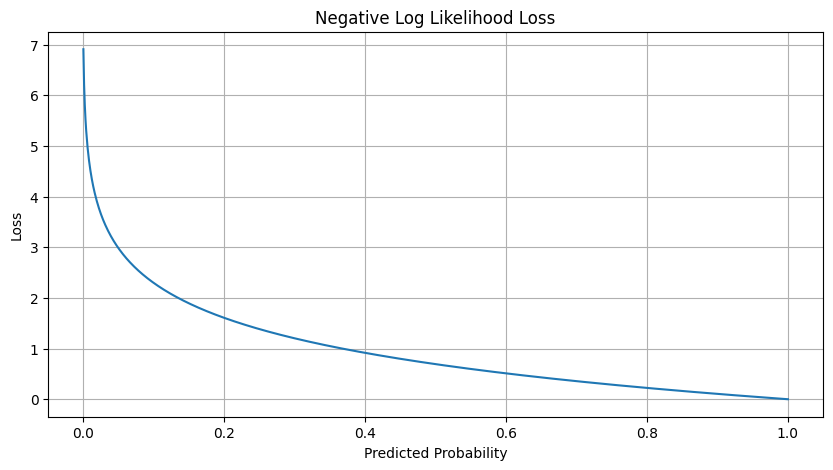

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Generate probabilities from 0.001 to 1.0
p = np.linspace(0.001, 1.0, 1000)
nll = -np.log(p)

plt.figure(figsize=(10, 5))
plt.plot(p, nll)
plt.title('Negative Log Likelihood Loss')
plt.xlabel('Predicted Probability')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

## Example of target with class indices


In [44]:
import torch
import torch.nn as nn

loss = nn.CrossEntropyLoss()
input = torch.randn(1, 5)
target = torch.tensor([[0.0,0.0,1.0,0.0,0.0]])
output = loss(input, target)

print(f"Input: {input}")
print(f"Target: {target}")
print(f"Cross-entropy loss from PyTorch: {output}")

input_softmax = nn.Softmax(dim=1)(input)
ce_loss = torch.mean(-torch.sum(target * torch.log(input_softmax), 1))
print(f"Cross-entropy loss from scratch: {ce_loss}")


Input: tensor([[-0.3838, -0.2113,  0.5376, -1.6915, -0.3022]])
Target: tensor([[0., 0., 1., 0., 0.]])
Cross-entropy loss from PyTorch: 0.8797142505645752
Cross-entropy loss from scratch: 0.8797142505645752


As we can see, the loss from PyTorch and the loss from scratch are the same. It's important to note that internally PyTorch applies the softmax function to the input before computing the loss.

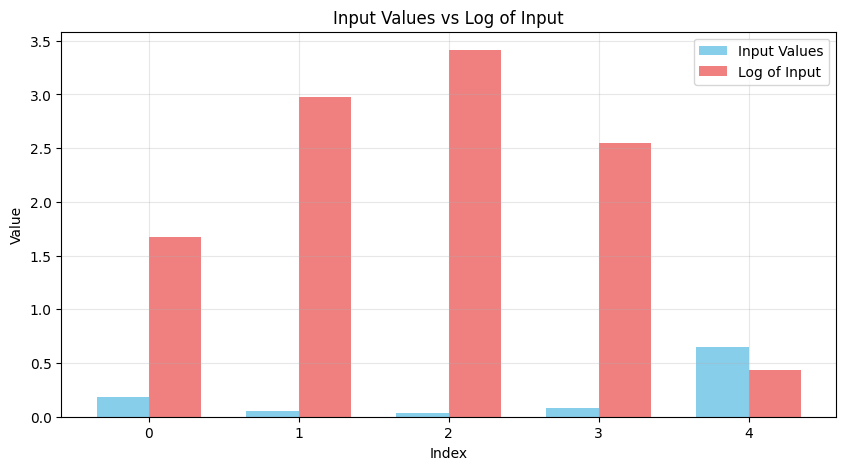

In [36]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))

# Convert tensors to numpy arrays for plotting - using detach()
input_np = input.detach().numpy()[0]
log_input_np = -np.log(input_np)

x = np.arange(len(input_np))
width = 0.35

plt.bar(x - width/2, input_np, width, label='Input Values', color='skyblue')
plt.bar(x + width/2, log_input_np, width, label='Log of Input', color='lightcoral')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Input Values vs Log of Input')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(x)

plt.show()

# References

- [Cross-entropy loss](https://www.youtube.com/watch?v=tRsSi_sqXjI)
